#### Introduction

#### 1. Frame the business problem at hand:

#### The ability to group a large dataset of News Documents and classify them.

#### 1.1 Initial Evaluation of Potential Value of said project if Implemented:

#### Why do it? Why should my data science team prioritize this project instead of another? Politics make up a s significant aspect in size of any country. Politicians will find a data product which can group and classify a large dataset of new documents quite useful in saving them precious time. What is the metric to optimize for this project? Time, the most valuable resource. What does said project involve? What is the potential rough value of this project? Precious time saved. What happens if this project is not implemented? Did our data science team choose the correct metric? What is the outcome of this step? Time saved.


#### 1.2 Determine Current Approach/ Create Baseline Model:

#### Why do it? Chosen ML model should beat baseline model(benchmark) and ADD Potential Value. ADDED Potential Value of chosen ML model worth the time investment? What does determining current approach/ creating a baseline model involve? Checking to see if there is a baseline model if not implement one which ususally requires quick, rudimentary counting methods. What happens if this step is not implemented? Unable to discern whether chosen ML model was worth it? Unable to tell if chosen ML model beat Baseline Model (benchmarK) and ADD Potential Value? Unable to tell whether the ADDED Potential Value of the chosen ML model is worth it? What is the outcome of this step? Determine if ADDED Potential Value of chosen ML model was worth the time investment.

#### 1.3 Team Discussion of the Data Science Process:

#### Why do it? Having many brains invovled in the data science process helps eliminate signifact obstacles. What does this involve? All the brains involved in the data science process thoroughly go through the entire data science process starting with step 2 -> collecting the raw data. What happens if not done? Potential to come across many significant obstacles throughout  the data science process. What is the outcome of this step? Much less significant obstacles throughout the data science process.

#### Delving into the Data Science Process:

#### 2) Collect the raw data needed for the problem:

#### The chosen data set contains a collection of 18828 newsgroup documents. Each document belongs to a particular newsgroup. There are 20 different newgroups:
#### comp.graphics
#### comp.os.ms-windows.misc
#### comp.sys.ibm.pc.hardware
#### comp.sys.mac.hardware
#### comp.windows.x rec.autos
#### rec.motorcycles
#### rec.sport.baseball
#### rec.sport.hockey sci.crypt
#### sci.electronics
#### sci.med
#### sci.space
#### misc.forsale talk.politics.misc
#### talk.politics.guns
#### talk.politics.mideast talk.religion.misc
#### alt.atheism
#### soc.religion.christian

#### Duplicate newgroup documents (messages) have been removed and original messages only  contain "From" and "Subject" headers. Each message contains:
#### Newsgroup: 
#### Document_id: 
#### From: 
#### Subject: 

#### The file format for each message is text.
#### The chosen data set can be found: http://qwone.com/~jason/20Newsgroups/
#### And much appreciation for Ken Lang for the collection of the data and also previous Kaggle contributors of analysis

In [1]:
# import neccessary data science python modules
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,  MiniBatchKMeans, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
import re
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import en_core_web_sm
from sklearn.utils import resample
import spacy
import time
from sklearn import metrics
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from os import listdir
from os.path import isfile, join
import string
%matplotlib inline

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
my_path = "Raw_Data/20_Newsgroups"

#### 3) Process & Explore  the data before in depth analysis:

In [3]:
#creating a list of folder names to make valid pathnames later

folders = [f for f in listdir(my_path)]

In [4]:
# view list folders

folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
#creating a 2D list to store list of all files in different folders

files = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    files.append([f for f in listdir(folder_path)])

In [6]:
# view 2D list files

files

[['49960',
  '51060',
  '51119',
  '51120',
  '51121',
  '51122',
  '51123',
  '51124',
  '51125',
  '51126',
  '51127',
  '51128',
  '51130',
  '51131',
  '51132',
  '51133',
  '51134',
  '51135',
  '51136',
  '51139',
  '51140',
  '51141',
  '51142',
  '51143',
  '51144',
  '51145',
  '51146',
  '51147',
  '51148',
  '51149',
  '51150',
  '51151',
  '51152',
  '51153',
  '51154',
  '51155',
  '51156',
  '51157',
  '51158',
  '51159',
  '51160',
  '51161',
  '51162',
  '51163',
  '51164',
  '51165',
  '51169',
  '51170',
  '51171',
  '51172',
  '51173',
  '51174',
  '51175',
  '51176',
  '51177',
  '51178',
  '51179',
  '51180',
  '51181',
  '51182',
  '51183',
  '51184',
  '51185',
  '51186',
  '51187',
  '51188',
  '51189',
  '51190',
  '51191',
  '51192',
  '51193',
  '51194',
  '51195',
  '51196',
  '51197',
  '51198',
  '51199',
  '51200',
  '51201',
  '51202',
  '51203',
  '51204',
  '51205',
  '51206',
  '51208',
  '51209',
  '51210',
  '51211',
  '51212',
  '51213',
  '51214',

In [7]:
#checking total no. of files gathered

sum(len(files[i]) for i in range(20))

18828

In [8]:
#creating a list of pathnames of all the documents
#this would serve to split our dataset into train & test later without any bias

pathname_list = []
for fo in range(len(folders)):
    for fi in files[fo]:
        pathname_list.append(join(my_path, join(folders[fo], fi)))

In [9]:
# view list pathname_list

pathname_list

['Raw_Data/20_Newsgroups\\alt.atheism\\49960',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51060',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51119',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51120',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51121',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51122',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51123',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51124',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51125',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51126',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51127',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51128',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51130',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51131',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51132',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51133',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51134',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51135',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51136',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51139',
 'Raw_Data/20_Newsgroups\\alt.atheism\\51140',
 'Raw_Data/20

In [10]:
#total number of files gathered

len(pathname_list)

18828

In [11]:
#making an array containing the classes each of the documents belong to

Y = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    num_of_files= len(listdir(folder_path))
    for i in range(num_of_files):
        Y.append(folder_name)

In [12]:
# view list Y

Y

['alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.at

In [13]:
len(Y)

18828

In [14]:
# lists -> numpy arrays

np_arr_folders = np.array(folders)

np_arr_files = np.array(files)

np_arr_pathname_list = np.array(pathname_list)

np_arr_Y = np.array(Y)

In [15]:
# numpy arrays -> pandas dataframes

df_files = pd.DataFrame(np_arr_files)

df_pathname_list = pd.DataFrame(np_arr_pathname_list)

df_Y = pd.DataFrame(np_arr_Y)

In [16]:
df_Y[0]

0               alt.atheism
1               alt.atheism
2               alt.atheism
3               alt.atheism
4               alt.atheism
5               alt.atheism
6               alt.atheism
7               alt.atheism
8               alt.atheism
9               alt.atheism
10              alt.atheism
11              alt.atheism
12              alt.atheism
13              alt.atheism
14              alt.atheism
15              alt.atheism
16              alt.atheism
17              alt.atheism
18              alt.atheism
19              alt.atheism
20              alt.atheism
21              alt.atheism
22              alt.atheism
23              alt.atheism
24              alt.atheism
25              alt.atheism
26              alt.atheism
27              alt.atheism
28              alt.atheism
29              alt.atheism
                ...        
18798    talk.religion.misc
18799    talk.religion.misc
18800    talk.religion.misc
18801    talk.religion.misc
18802    talk.religi

In [17]:
# routine to transform df_Y to numeric -> rtne_trnsfrm_df_Y_to_numeric

def rtne_trnsfrm_df_Y_to_numeric(df_element):
    # control structure -> decision making -> control structure executed only once-> 
    # statement/ group of statements within a block(conditional source code) executed sequentially but only once if boolean expression (condition) evaluates to true (r_value of non-zero/ not null)
    if df_element == "alt.atheism":
        df_element = 0
    if df_element == "comp.graphics":
        df_element = 1
    if df_element == "comp.os.ms-windows.misc":
        df_element = 2
    if df_element == "comp.sys.ibm.pc.hardware":
        df_element = 3
    if df_element == "comp.sys.mac.hardware":
        df_element = 4
    if df_element == "comp.windows.x":
        df_element = 5
    if df_element == "misc.forsale":
        df_element = 6
    if df_element == "rec.autos":
        df_element = 7
    if df_element == "rec.motorcycles":
        df_element = 8
    if df_element == "rec.sport.baseball":
        df_element = 9
    if df_element == "rec.sport.hockey":
        df_element = 10
    if df_element == "sci.crypt":
        df_element = 11
    if df_element == "sci.electronics":
        df_element = 12
    if df_element == "sci.med":
        df_element = 13
    if df_element == "sci.space":
        df_element = 14
    if df_element == "soc.religion.christian":
        df_element = 15
    if df_element == "talk.politics.guns":
        df_element = 16
    if df_element == "talk.politics.mideast":
        df_element = 17
    if df_element == "talk.politics.misc":
        df_element = 18
    if df_element == "talk.religion.misc":
        df_element = 19
    return df_element
    
 

    



# new pandas column df_Y[numerc]
df_Y["numerc"] = df_Y[0].apply(rtne_trnsfrm_df_Y_to_numeric).copy()


In [18]:
# view new column df_Y["numerc"]

df_Y["numerc"]

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
18798    19
18799    19
18800    19
18801    19
18802    19
18803    19
18804    19
18805    19
18806    19
18807    19
18808    19
18809    19
18810    19
18811    19
18812    19
18813    19
18814    19
18815    19
18816    19
18817    19
18818    19
18819    19
18820    19
18821    19
18822    19
18823    19
18824    19
18825    19
18826    19
18827    19
Name: numerc, Length: 18828, dtype: int64

In [19]:
# NLP process data part 1:
# text cleaning(preprocessing)

# stopwords
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
 'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 
 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']

#function to preprocess the words list to remove punctuations

def preprocess(words):
    #we'll make use of python's translate function,that maps one set of characters to another
    #we create an empty mapping table, the third argument allows us to list all of the characters 
    #to remove during the translation process
    
    #first we will try to filter out some  unnecessary data like tabs
    table = str.maketrans('', '', '\t')
    words = [word.translate(table) for word in words]
    
    punctuations = (string.punctuation).replace("'", "") 
    # the character: ' appears in a lot of stopwords and changes meaning of words if removed
    #hence it is removed from the list of symbols that are to be discarded from the documents
    trans_table = str.maketrans('', '', punctuations)
    stripped_words = [word.translate(trans_table) for word in words]
    
    #some white spaces may be added to the list of words, due to the translate function & nature of our documents
    #we remove them below
    words = [str for str in stripped_words if str]
    
    #some words are quoted in the documents & as we have not removed ' to maintain the integrity of some stopwords
    #we try to unquote such words below
    p_words = []
    for word in words:
        if (word[0] and word[len(word)-1] == "'"):
            word = word[1:len(word)-1]
        elif(word[0] == "'"):
            word = word[1:len(word)]
        else:
            word = word
        p_words.append(word)
    
    words = p_words.copy()
        
    #we will also remove just-numeric strings as they do not have any significant meaning in text classification
    words = [word for word in words if not word.isdigit()]
    
    #we will also remove single character strings
    words = [word for word in words if not len(word) == 1]
    
    #after removal of so many characters it may happen that some strings have become blank, we remove those
    words = [str for str in words if str]
    
    #we also normalize the cases of our words
    words = [word.lower() for word in words]
    
    #we try to remove words with only 2 characters
    words = [word for word in words if len(word) > 2]
    
    return words

#function to remove stopwords

def remove_stopwords(words):
    words = [word for word in words if not word in stopwords]
    return words

#function to convert a sentence into list of words

def tokenize_sentence(line):
    words = line[0:len(line)-1].strip().split(" ")
    words = preprocess(words)
    words = remove_stopwords(words)
    
    return words

#function to remove metadata

def remove_metadata(lines):
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            start = i+1
            break
    new_lines = lines[start:]
    return new_lines


#function to convert a document into list of words

def tokenize(pathname_list):
    #load document as a list of lines
    f = open(pathname_list, 'r')
    text_lines = f.readlines()
    
    #removing the meta-data at the top of each document
    text_lines = remove_metadata(text_lines)
    
    #initiazing an array to hold all the words in a document
    doc_words = []
    
    #traverse over all the lines and tokenize each one with the help of helper function: tokenize_sentence
    for line in text_lines:
        doc_words.append(tokenize_sentence(line))

    return doc_words

#a simple helper function to convert a 2D array to 1D, without using numpy

def flatten(list):
    new_list = []
    for i in list:
        for j in i:
            new_list.append(j)
    return new_list



# data structure array to hold all sentences
#sentences = []

#for document in pathname_list:
    #load document as a list of lines
    #f = open(document, 'r')
    #doc_read = f.read()
    # Parse the cleaned novels. This can take a bit.
    #nlp = spacy.load('en')
    #nlp_doc_parse = nlp(doc_read)
    
    # Group into sentences.
    #sents = [[sent] for sent in nlp_doc_parse.sents]
    #sentences.append(sents)    
#implement dataframe of sentences to hold sentences
#df_sentences = pd.DataFrame(sentences)



# function for bag of features
# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentncs, bag_of_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=bag_of_words)
   
    df.loc[:, bag_of_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df




In [20]:
# NLP process data part2:

# feature generation (unsupervised learning)

# bag of words 

# data structure array to hold bag of words
bag_of_words = []

for document in pathname_list:
    bag_of_words.append(flatten(tokenize(document)))
  


np_arr_bag_of_words = np.asarray(flatten(bag_of_words))

#finding the number of unique words that we have extracted from the documents
words, counts = np.unique(np_arr_bag_of_words, return_counts=True)
len(words)


167336

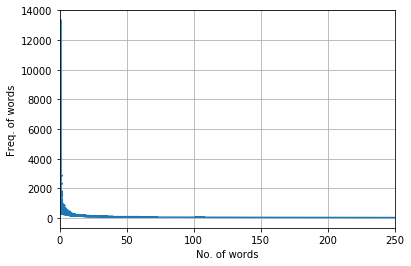

<Figure size 432x288 with 0 Axes>

In [21]:
# NLP process data part2 (cont):

# feature generation (unsupervised learning)
#sorting the unique words according to their frequency

freq, wrds = (list(i) for i in zip(*(sorted(zip(counts, words), reverse=True))))

f_o_w = []
n_o_w = []
for f in sorted(np.unique(freq), reverse=True):
    f_o_w.append(f)
    n_o_w.append(freq.count(f))
    
y = f_o_w
x = n_o_w
plt.xlim(0,250)
plt.xlabel("No. of words")
plt.ylabel("Freq. of words")
plt.plot(x, y)
plt.grid()
plt.show()
plt.tight_layout()

In [22]:
# NLP process data part2 (cont):

# feature generation (unsupervised learning)

# deciding to use 5000 words as features
n = 5000
features = wrds[0:n]



In [23]:
# NLP process data part2 (cont):

# feature generation (unsupervised learning)
#creating a dictionary that contains each document's vocabulary and ocurence of each word of the vocabulary 

dictionary = {}
doc_num = 1
for doc_words in bag_of_words:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary[doc_num] = {}
    for i in range(len(w)):
        dictionary[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [24]:
# NLP process data part2 (cont):

# feature generation (unsupervised learning)
#now we make a 2D array having the frequency of each word of our feature set in each individual documents

inpt_X_features = []
for k in dictionary.keys():
    row = []
    for f in features:
        if(f in dictionary[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    inpt_X_features.append(row)

In [25]:
# list  inpt_X_features -> numpy array
np_arr_inpt_X_features = np.asarray(inpt_X_features)

In [26]:
# np array np_arr_inpt_X_features -> pandas dataframe
df_inpt_X_features = pd.DataFrame(np_arr_inpt_X_features)

In [27]:
# view df_inpt_X_features
df_inpt_X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,1,0,6,1,3,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,0,6,6,16,21,5,1,4,9,6,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,1,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# shape of dataframe df_inpt_X_features

df_inpt_X_features.shape

(18828, 5000)

In [29]:
# normalize data so all input variables/features/dimensions have equal potential impact on clustering algorithms

norm_inpt_X_vars = normalize(df_inpt_X_features)

In [30]:
# for visualization purposes reduces dimensions -> 2 dimensions

X_pca = PCA(2).fit_transform(norm_inpt_X_vars)

In [31]:
# split data training and test for clustering

X_train_clus, X_test_clus, Y_train_clus, Y_test_clus = train_test_split(X_pca, df_Y["numerc"], random_state=0, test_size=0.25)

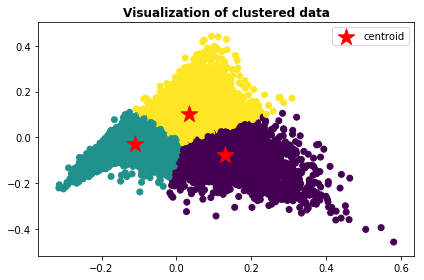

In [33]:
# clustering training data -> to find associations of similar datapoints -> algorithm clustering -> hard clustering

# K-Means Clustering
KMeans_fit = KMeans(n_clusters=3, init = "k-means++", random_state=42).fit(X_train_clus)

# Calculate predicted values.
y_pred_X_train_clus = KMeans(n_clusters=3, init = "k-means++", random_state=42).fit_predict(X_train_clus)

#obtain centroids
centroids = KMeans_fit.cluster_centers_

# Plot the solution.
plt.scatter(X_train_clus[:,0], X_train_clus[:,1], c=y_pred_X_train_clus)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()

plt.title('Visualization of clustered data', fontweight='bold')
plt.tight_layout()
plt.show()


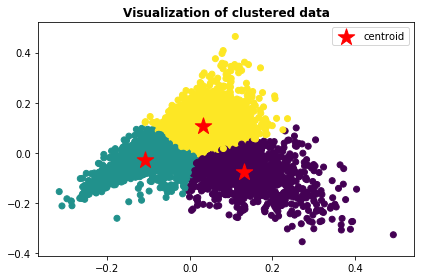

In [34]:
# clustering test data -> to find associations of similar datapoints -> algorithm clustering -> hard clustering

# K-Means Clustering
KMeans_fit = KMeans(n_clusters=3, init = "k-means++", random_state=42).fit(X_test_clus)

# Calculate predicted values.
y_pred_X_test_clus = KMeans(n_clusters=3, init = "k-means++", random_state=42).fit_predict(X_test_clus)

#obtain centroids
centroids = KMeans_fit.cluster_centers_

# Plot the solution.
plt.scatter(X_test_clus[:,0], X_test_clus[:,1], c=y_pred_X_test_clus)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()

plt.title('Visualization of clustered data', fontweight='bold')
plt.tight_layout()
plt.show()


#### KMeans good at capturing structure of data if the clusters are of radially symmetrical isotropic shape; true clusters. Both the training data and test data have somewhat of a true cluster shape.

In [119]:
# Split the data into four equally-sized samples for clustering evaluation. First we break it in half:

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    norm_inpt_X_vars,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

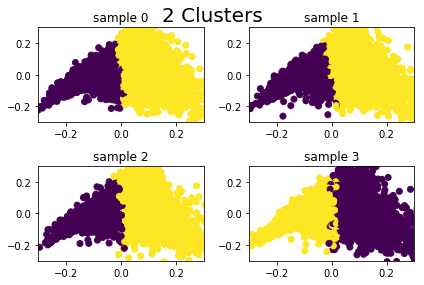

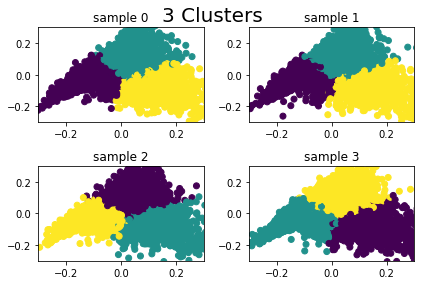

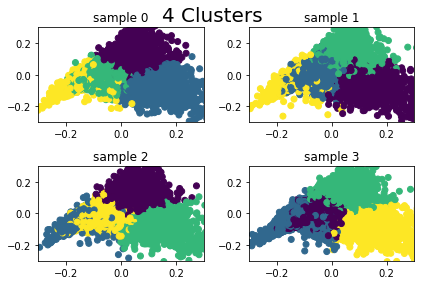

In [120]:
# for KMeans evaluation use: consistency: same kind of datapoints grouped together each subset & descriptive level stat ,  similarity silhoutte coefficient 

# consistency

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        
        
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')        

#### There seems to be consistency of the same kind of datapoints grouped together for every subsample. 3 clusters appear to have the most raidially symmetric isotropic shape.

In [123]:
# ARI

metrics.adjusted_rand_score(df_Y["numerc"], y_pred_full)

0.03554229894476242

#### The Adjusted Random Index indicates that how the pairs of datapoints regarding the ground truth and new solution (clusters) relate are close to perfect randomness.

In [125]:
# similarity silhoutte coefficient

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, init = "k-means++", random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.006931740869246871
0.007082197726351827
0.0060465343092708694
0.007269608405237574


#### The similarity silhoutte coefficient reveals that there is consistency of coefficients between subsets and that samples are very close to neighboring clusters.

In [126]:
# Mean shift clustering for training data

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train_clus, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_clus)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
centroids = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


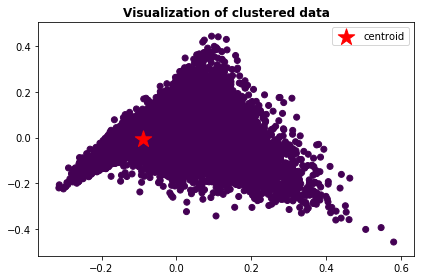

In [127]:
plt.scatter(X_train_clus[:, 0], X_train_clus[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1] ,marker='*', s=300,
            c='r', label='centroid')
plt.legend()

plt.title('Visualization of clustered data', fontweight='bold')
plt.tight_layout()
plt.show()

In [128]:
# Mean shift clustering for test data

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_test_clus, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_test_clus)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
centroids = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


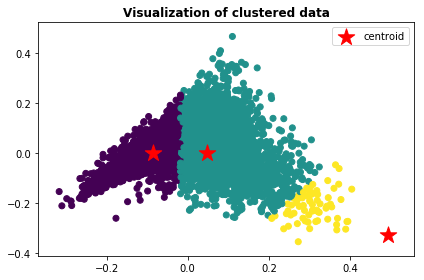

In [129]:
plt.scatter(X_test_clus[:, 0], X_test_clus[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1] ,marker='*', s=300,
            c='r', label='centroid')
plt.legend()

plt.title('Visualization of clustered data', fontweight='bold')
plt.tight_layout()
plt.show()

#### Via MeanShift both the training data and test data have somewhat raidially geometric isotropic shapes of true clusters and thus good at capturing the underlying patterns in the data.

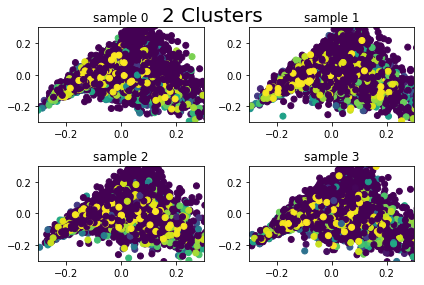

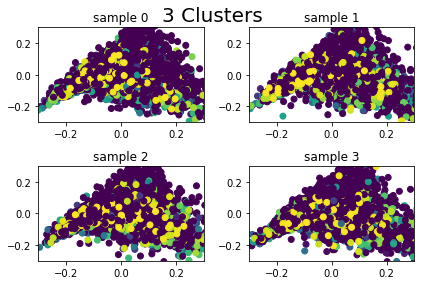

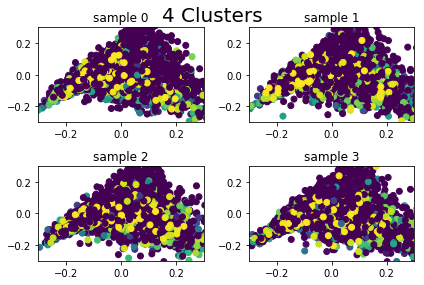

In [130]:
# for MeanShift evaluation use: consistency: same kind of datapoints grouped together each subset & descriptive level stat ,  similarity silhoutte coefficient 

# consistency

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use meanshift to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = ms.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        
        
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')        


#### The plots show for every subsample there is much distictions between clusters.

In [132]:
# ARI

metrics.adjusted_rand_score(df_Y["numerc"], y_pred_full)

0.0003726855553506633

#### The Adjusted Random Index indicates that how the pairs of datapoints regarding the ground truth and new solution (clusters) relate are very much  towards perfect randomness.

In [133]:
# similarity silhoutte coefficient

for sample in [X1, X2, X3, X4]:
    model = ms.fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

-0.05913941708511197
-0.05205859882097695
-0.055332229753620316
-0.059590336301778915


#### The similarity silhoutte coefficient illustrates that there seems to be a consistency of coefficients between subsets and the samples are assigned to wrong clusters  -> very bad clusters.

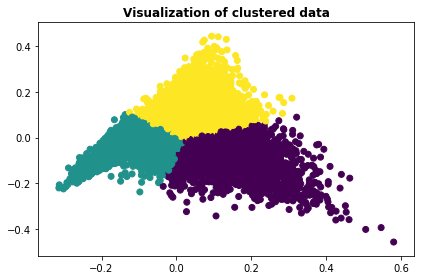

In [134]:
# Spectral clustering for training data

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train_clus)



#Predicted clusters.
predict=sc.fit_predict(X_train_clus)

#Graph results.
plt.scatter(X_train_clus[:, 0], X_train_clus[:, 1], c=predict)


plt.title('Visualization of clustered data', fontweight='bold')
plt.tight_layout()
plt.show()

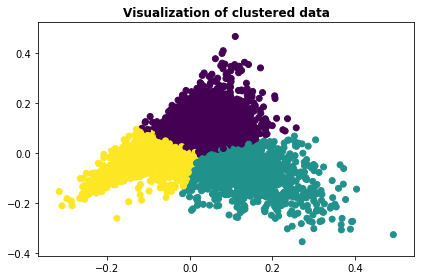

In [135]:
# Spectral clustering for test data

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_test_clus)

#Predicted clusters.
predict=sc.fit_predict(X_test_clus)

#Graph results.
plt.scatter(X_test_clus[:, 0], X_test_clus[:, 1], c=predict)
plt.title('Visualization of clustered data', fontweight='bold')
plt.tight_layout()
plt.show()

#### Via Spectral both the training data and test data have somewhat raidially geometric isotropic shapes of true clusters and thus good at capturing the underlying patterns in the data.

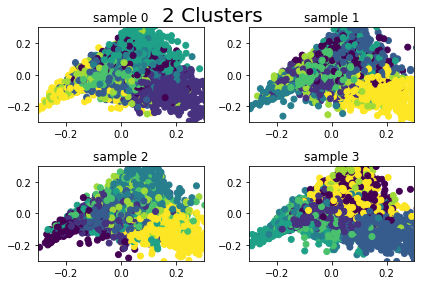

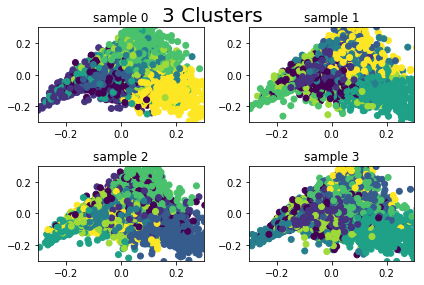

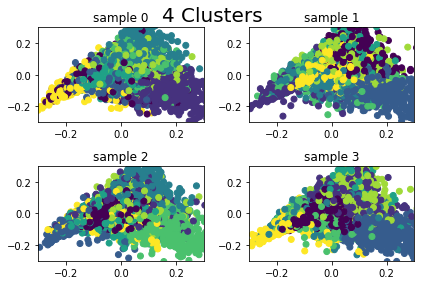

In [138]:
# for Spectral evaluation use: consistency: same kind of datapoints grouped together each subset & descriptive level stat ,  similarity silhoutte coefficient 
sc = SpectralClustering()


# consistency

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use spectral to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = sc.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        
        
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')        


#### For every subsample of the data the plots show different kinds of datapoints grouped together; different clusters no consistency

In [141]:
# ARI

metrics.adjusted_rand_score(df_Y["numerc"], y_pred_full)

0.03400141239514617

#### The Adjusted Random Index indicates that how the pairs of datapoints regarding the ground truth and new solution (clusters) relate are close to perfect randomness.

In [142]:
# similarity silhoutte coefficient

for sample in [X1, X2, X3, X4]:
    model = sc.fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.006854255752602123
0.006875155965088299
0.006049193285083395
0.006663297855410663


#### The similarity silhoutte coefficient reveals that there is consistency of coefficients between subsets and that samples are very close to neighboring clusters.

#### The MeanShift clustering algorithm performed the worst in capturing the structure of the data due to its clusters being the least true cluster kind of shape, the ARI suggests how the new solution relates to the ground truth is the most close to perfect randomness and the similarity silhoutte coefficient are negative which means the samples are assigned to the wrong clusters. Between the K-Means and Spectral i would go with K-Means because it had slightly better true cluster shape and slightly better ARI and similarity coefficients.

#### 4) Perform in-depth analysis:

In [29]:
# count the number of items in each class/newsgroup
df_Y["numerc"].value_counts()

10    999
15    997
9     994
8     994
11    991
13    990
7     990
14    987
2     985
3     982
12    981
5     980
1     973
6     972
4     961
17    940
16    910
0     799
18    775
19    628
Name: numerc, dtype: int64

#### This classification -> multiclassification scenario for ml modeling. 20 different classes. Most all except 3 classes appear to be balanced in that they are slightly below with one of the three significant bit below in count then the rest. Since it is a multiclassification scenario the most common ml performance metrics are average accuracy, F1 score, Log-loss, and Mathews Correlation Coefficient. Since not all the classes are balanced i intend to disqaulify Log-loss since it is symetric in it method and does not consider class imbalances. Also not sure about how average accuracy would do in a multiclassification with class imbalances. Although micro averaging & macro averaging methods can be done , since Mathews Correlation Coefficient is more geared towards high performance in binary classification. I chose to implement F1 score with the micro averaging method due to class imbalance. And i set the decision threshold to .5 although an indepth discussion with stakeholders would probably render a different threshold.

In [30]:
# split data training and test for modeling

X_train, X_test, Y_train, Y_test = train_test_split(df_inpt_X_features, df_Y["numerc"], random_state=0, test_size=0.25)

In [74]:
# NLP supervised learning
# conduct in depth analysis on NLP processed data
# which models to use:
# predicting categories -> three + categories -> multiclass classification : attempting  multiclass random forest & multiclass logistic regression & multiclass multinomial naive bayes 

# multiclass random forest
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, Y_train)
Y_train_predict = rfc.predict(X_train)



print(X_train.shape, Y_train.shape)

print('RFC Training set F1 score- micro:', metrics.f1_score(Y_train, Y_train_predict, average = "micro"))






(14121, 5000) (14121,)
RFC Training set F1 score- micro: 0.9922809999291835


In [76]:
print(X_test.shape, Y_test.shape)

Y_test_predict = rfc.predict(X_test)
print('RFC Test set F1 score- micro:',metrics.f1_score(Y_test, Y_test_predict, average = "micro"))

(4707, 5000) (4707,)
RFC Test set F1 score- micro: 0.6913108136817506


#### The multiclass random forest model is overfitting immmensely. This is apparent by its training set f1 score micro being .99 while test set mean f1 score micro being .68. If it was underfitting then both training set and test set mean accuracy would be low signalling inability to capture relationships in the training data. Since our multiclass random forest model is overfitting it captures alot of noise along with underlying patterns in the data. 

In [31]:
# multiclass logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_train_predict = lr.predict(X_train)


print(X_train.shape, Y_train.shape)

print('LR Training set F1 score - micro:', metrics.f1_score(Y_train, Y_train_predict, average = "micro"))

(14121, 5000) (14121,)
LR Training set F1 score - micro: 0.9907938531265491


In [32]:
print(X_test.shape, Y_test.shape)
      
Y_test_predict = lr.predict(X_test)
print('LR Test set F1 score0- micro:', metrics.f1_score(Y_test, Y_test_predict, average = "micro"))

(4707, 5000) (4707,)
LR Test set F1 score0- micro: 0.8121946037816019


#### The multiclass logistic regression model is overfitting but not as much the multiclass random forest model. This is apparent by its training set F1 score micro being .99 while test set F1 score micro being .81. Since our multiclass logistic regression model is overfitting it also captures alot of noise along with underlying patterns in the data.¶

In [82]:
# multiclass multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

MNB.fit(X_train, Y_train)
Y_train_predict = MNB.predict(X_train)

print(X_train.shape, Y_train.shape)

print('MNB Training set F1 score- micro:', metrics.f1_score(Y_train, Y_train_predict, average = "micro"))


(14121, 5000) (14121,)
MNB Training set F1 score- micro: 0.858083705120034


In [84]:
print(X_test.shape, Y_test.shape)

Y_test_predict = MNB.predict(X_test)
print('MNB Test set F1 score - micro:', metrics.f1_score(Y_test, Y_test_predict, average = "micro"))

(4707, 5000) (4707,)
MNB Test set F1 score - micro: 0.8022094752496283


#### The Multiclass Multinomial Naive Bayes model does not seem to overfit  since the training set F1 score micro .85 vs .80 test set F1 score micro. Nor does the model underfit since .85 is not bad score of the model capturing the underlyin relationships in the training data.

#### 5. Communicate Results of analysis (Potential Data Product):

#### There are most likely many reasons why both the multiclass random forest model and multiclass logistic regression model overfit quite a bit compared to the Multiclass Multinomial Naive Bayes. Some of the possible reasons i can think of are that some ml learning models are implemented better than others to handle a large number of input x variables(features) and some are perform better with linear data. It appears the Multiclass Multinomial Naive Bayes classification performed the best with the closest training and test mean accuracy scores with training score being just a tad higher and also the training score being at the higher end. All signaling no overfitting and not much really underfitting.  Going forward and as mentioned previously doing dimension reduction on the 5000 features, experimenting with other methods of NLP feature extration and tuning the parameters of the Multiclass Multinomial Naive Bayes classifier in a validation set  would probably boost the test mean accuracy score a bit higher i assume. Attempting to use the K-Means cluster generation as features and comparing it to the  NLP feature generation previously performed would be i think pretty effective and the accuracy scores between the K-Means and NLP feature generation would be quite similar. 

#### 6. ML Monitoring & Feedback:


#### Why do it? Is the chosen ML model's performance evaluation metric stable? Is it reliable? Is the data reliable? What does this step involve? Couple weeks(2) in assesment of chosen ML model's performance evaluation metric.. stable? reliable? What happens if ML Monitoring & Feedback not done? Stakeholders not convinced that chosen ML Model's performance evaluation metric is stable & reliable. What is outcome of this step? Stakeholder are convinced and content.

#### 7. ML Model to Baseline Model evaluation via A/B Testing:

#### I would have like to have the pleasure to make said valuable data science project most credible. However, unfortunately due to time i was unable to implement couple essential critical steps: determine current approach/ create Baseline Model, ML Monitoring & Feedback, and lastly ML Model to Baseline Model evaluation via A/B Testing. As mentioned before i would like to present the most credible valuable data science project and thus plan to execute this project in its entirety soon.